# Случайный лес
![forest](../pics/DJI_0039.jpg)


1. <img src="../pics/bootstrap.png" style="width:50%" align="left"/>
    Формируем датасеты с помощью бутстрепа 
</br></br></br></br></br></br></br></br></br></br></br></br></br>
2. <img src="../pics/trees.png" style="width:50%" align = "left"/>
    Обучаем деревья
</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>
3. <img src="../pics/IMG_3328.jpg" style="width:30%" align = "left"/>
    Г О Л О С О В А Н И Е 

# РАНДОМ ФОРЕСТ УМЕНЬШАЕТ РАЗБРОС


[Почему?](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)  
[Потому](https://en.wikipedia.org/wiki/Central_limit_theorem)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
def print_dec_plot(MODEL, title="Дерево решений"):
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = MODEL.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, marker='.',)
    plt.title(title)
    plt.show()

In [3]:
X, y = make_circles(n_samples=1000, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

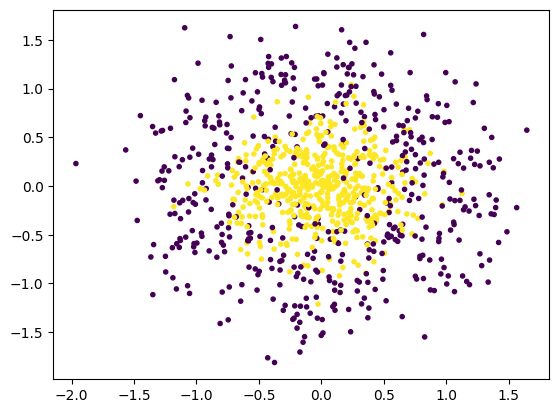

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.',)

0.7800480769230769


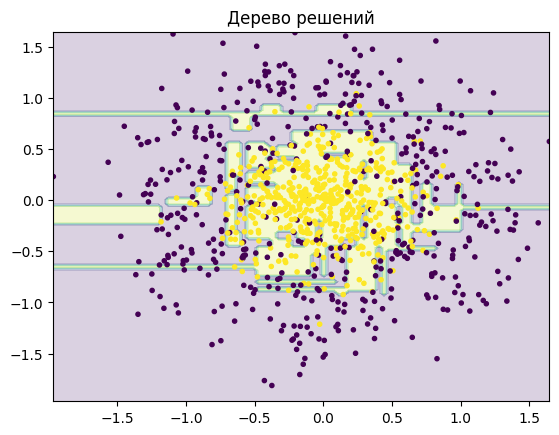

In [5]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)
print(roc_auc_score(y_test_circles, dtree.predict_proba(X_test_circles)[:, 1]))

print_dec_plot(dtree, "Дерево решений")

In [6]:
dtree.decision_path(X_train_circles[:1, :]).toarray()


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

##### Давайте обучим простой RandomForest


0.7532051282051283


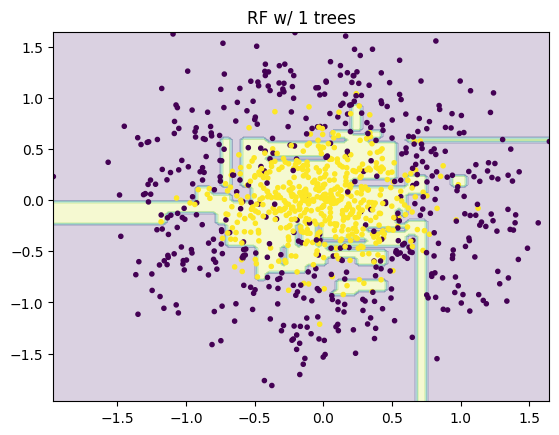

0.8505608974358974


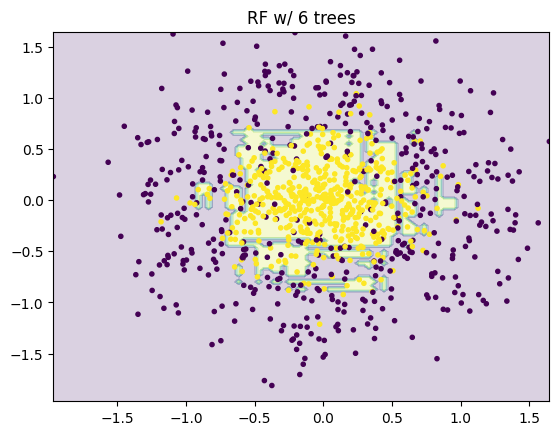

0.8835136217948718


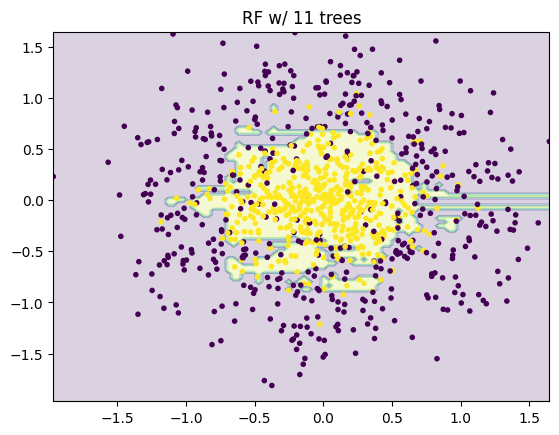

0.894130608974359


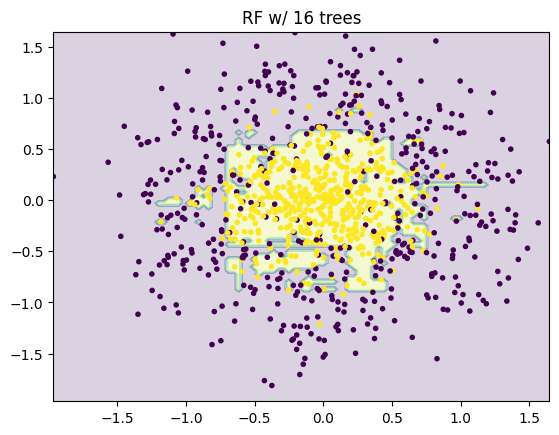

0.8975861378205129


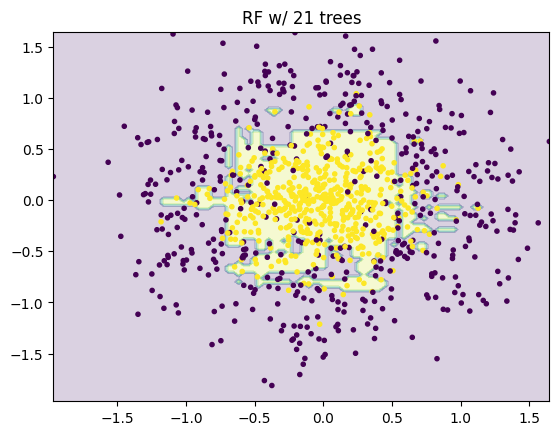

0.8786057692307692


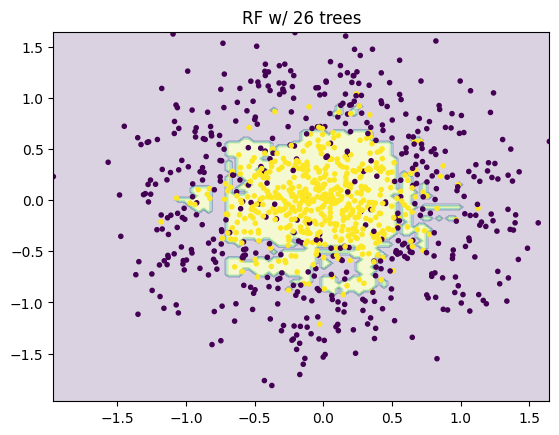

0.8891726762820512


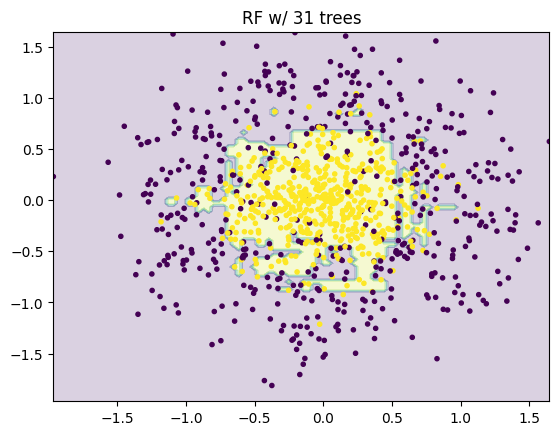

0.8998898237179487


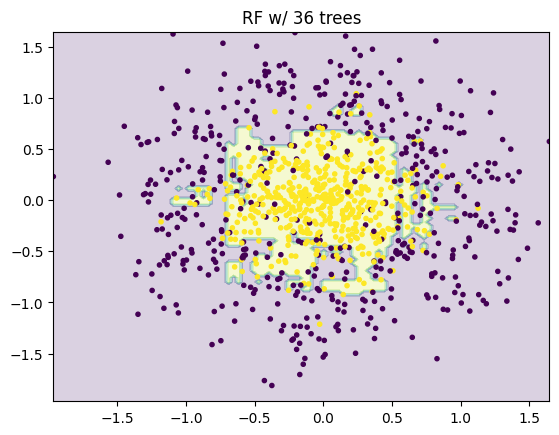

0.8936298076923077


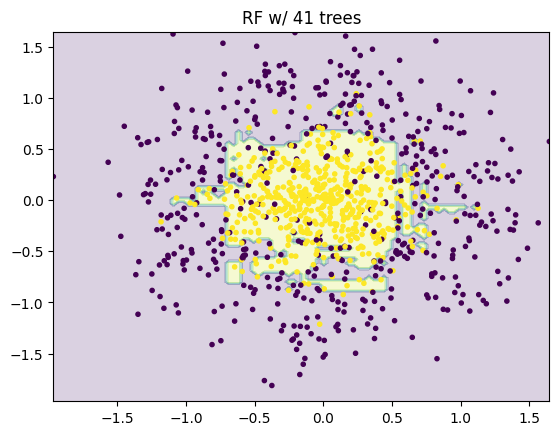

0.8913261217948719


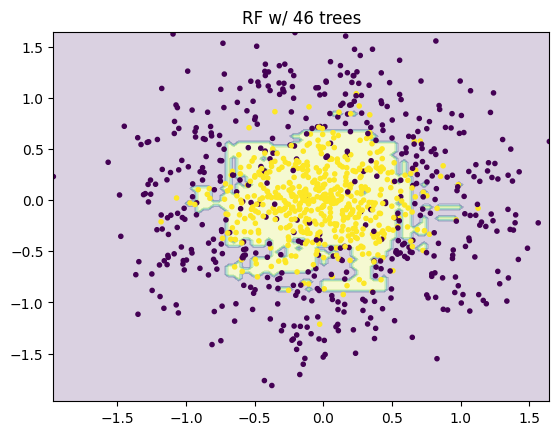

In [7]:
for i in range(1, 50, 5):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train_circles, y_train_circles)
    print(roc_auc_score(y_test_circles, clf.predict_proba(X_test_circles)[:, 1]))

    print_dec_plot(clf, f"RF w/ {i} trees")

In [8]:
train_loss = []
test_loss = []

for i in range(1, 100, 5):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train_circles, y_train_circles)
    train_loss.append(roc_auc_score(y_train_circles, clf.predict_proba(X_train_circles)[:, 1]))
    test_loss.append(roc_auc_score(y_test_circles, clf.predict_proba(X_test_circles)[:, 1]))

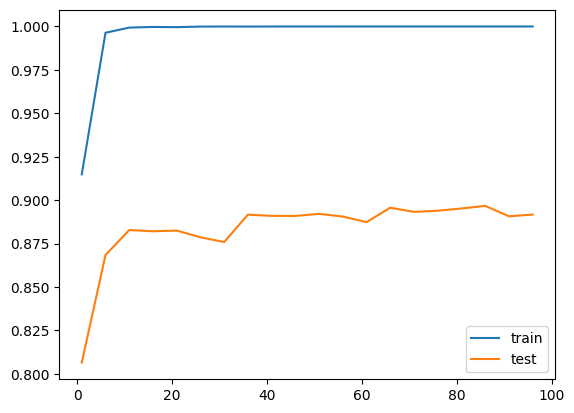

In [9]:
plt.plot(range(1, 100, 5), train_loss, label='train')
plt.plot(range(1, 100, 5), test_loss, label='test')
plt.legend()

In [10]:
test_score = []

for i in range(1, 900, 50):
    clf = RandomForestClassifier(n_estimators=i)
    a = cross_val_score(clf, X, y, cv=10)
    test_score.append(a)

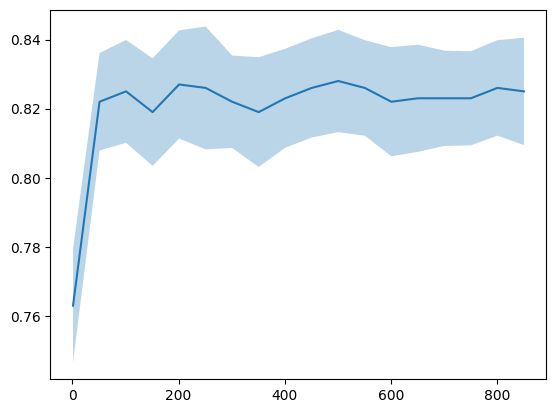

In [11]:
plt.plot(range(1, 900, 50), [np.mean(i) for i in test_score])


plt.fill_between(range(1, 900, 50), 
                 [np.mean(i) + np.std(i) / 2 for i in test_score], 
                 [np.mean(i) - np.std(i) / 2 for i in test_score], alpha = 0.3)

##### Давайте посмотрим как меняется качество на тесте в завимисомти от параметров `n_estimators`, `max_features`, `min_samples_split`, `min_samples_leaf`, `max_depth`

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [13]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
]

data = pd.read_csv('../lesson2_2/adult/adult.data', sep=', ', names=names, index_col=False)
data.head()

/var/folders/dv/l5yj1vt95y51qzyhmdns2cgw0000gn/T/ipykernel_75121/2908249995.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('../lesson2_2/adult/adult.data', sep=', ', names=names, index_col=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
X, y = data.drop(columns=['income']), data['income']

In [15]:
y = y.replace({'<=50K': 1, '>50K': 0})

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    shuffle=True, stratify=y, random_state=42)

In [17]:
encode = ColumnTransformer([
    ('text2int', OrdinalEncoder(), ['workclass', 'education', 'marital-status', 
                                    'occupation', 'race', 'sex']),
    ('scale', StandardScaler(), ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']),
], remainder='drop')

pipe = Pipeline([
    ('preprocess', encode),
    ('classify', RandomForestClassifier(n_jobs=-1))
])

In [18]:
cv = KFold(n_splits=5)

In [19]:
from sklearn.model_selection import GridSearchCV, KFold

In [25]:
params = {
    'preprocess__scale': [StandardScaler(), MinMaxScaler()],
    'preprocess__text2int': [OrdinalEncoder(), OneHotEncoder(sparse=False)],
    'classify__n_estimators': range(100, 500, 99),
    'classify__max_features': range(2, 7, 2),
#     'classify__min_samples_split': range(2, 100, 5),
#     'classify__min_samples_leaf': range(1, 500, 10),
    'classify__max_depth': range(5, 50, 10)
}

In [30]:
gs = GridSearchCV(pipe, params, scoring='f1', cv=cv, n_jobs=-1, verbose=5)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [28]:
gs.best_score_

0.9140150023021911

In [29]:
gs.best_params_

{'classify__max_depth': 15,
 'classify__max_features': 4,
 'classify__n_estimators': 397,
 'preprocess__scale': StandardScaler(),
 'preprocess__text2int': OrdinalEncoder()}

hyperopt  
optuna

# Бустинг

### AdaBoost

1. Каждый объект имеет вес $\omega_i = \frac{1}{N}$, где $N$ - размер обучающей выборки
2. Строим решающий пень
3. Считаем его силу $W = \frac{1}{2}\log\left(\frac{1-err}{err}\right)$, где $err = \sum_{i=0}^{N}{\omega_i[y_i \neq \hat{y_i}]}$
4. Обновляем веса объектов $\begin{equation}
  \left\{\begin{array}{@{}l@{}}
    \omega_i = \omega_i e^{W} &&& \text{если} [y_i \neq \hat{y_i}] \\
    \omega_i = \omega_i e^{-W} &&& \text{если} [y_i = \hat{y_i}] \\
  \end{array}\right.\,
\end{equation}$
5. Нормализуем веса (чтобы они в сумме давали 1) $\omega_i = \frac{\omega_{i}}{\sum_{i}{\omega_i}}$
6. Формируем **новый датасет**, по размеру равный предыдущему, в который отбираем наблюдения случайно, учитывая их веса
7. Возвращаемся к шагу _1_
8. Повторяем процесс, пока не построим нужное число деревьев, или классификация на 100% верная
  
</br></br>
Новый объект классифицируется исходя из максимальной суммы сил деревьев

In [41]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import SCORERS

In [33]:
X, y = load_diabetes(as_frame=True, return_X_y=True)

In [34]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [64]:
dtr = DecisionTreeRegressor()

In [65]:
tree = DecisionTreeRegressor(max_depth=2)
abr = AdaBoostRegressor(base_estimator=tree, n_estimators=100, learning_rate=0.1)

In [66]:
cv = KFold(n_splits=5, shuffle=True)

In [86]:
cross_val_score(dtr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv).mean()

-6105.133738762559

In [87]:
cross_val_score(abr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv).mean()

-3668.687841073065

### Gradient Boosting

Дано: Обучающая выборка $\{\left( x_i, y_i \right) \}_{i=1}^{n}$ и **дифференциируемая** функция потерь $L\left(y_i, F\left(x\right)\right)$

1. Инициализировать модель константой $$ F_0(x) = \arg{\max_{\gamma}{\sum_{i=1}^{n}L(y_i, \gamma)}}$$
2. Для каждого $m = 1..M$:
    1. Для каждого $i$ вычислить $r_{im} = -\left[ \frac{\partial{L(y_i, F(x_i))}}{\partial{F(x_i)}}\right]_{F(x)=F_{m-1}(x)}$
    2. Обучить **регрессионное** дерево на $r_{im}$ и получить его листья
    3. Для каждого листа вычислить ответ, такой, что $$\gamma_{jm} = \arg\min_{\gamma}{\sum_{x_i\in R_{ij}}{L(y_i, F_{m-1}(x_i) + \gamma)}}$$
    4. Обновить $$F_{m}(x) = F_{m-1}(x) + \eta \sum_{j=1}^{J_{m}}{}\gamma_{jm}I(x \in R_{jm})$$
    
3. Выдать $F_{m}(x)$

In [1]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [2]:
gbr = GradientBoostingRegressor(learning_rate=0.05)

In [98]:
cross_val_score(gbr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv).mean()

-3539.630451438752

In [38]:
import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import f1_score

In [6]:
X, y = fetch_20newsgroups(return_X_y=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, 
                                                    stratify=y, random_state=42)

In [8]:
vec = TfidfVectorizer(max_features=25000)

In [9]:
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [21]:
gbc = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=3)
xgb = XGBClassifier()
lightgbc = LGBMClassifier()
cbc = CatBoostClassifier(text_features=[0], learning_rate=0.1)

In [34]:
gbc.fit(X_train_vec, y_train)
xgb.fit(X_train_vec, y_train)
lightgbc.fit(X_train_vec, y_train)
cbc.fit(np.array(X_train).reshape(-1, 1), y_train)

0:	learn: 2.6480005	total: 1.13s	remaining: 18m 49s
1:	learn: 2.4153716	total: 2.29s	remaining: 19m 4s
2:	learn: 2.2365611	total: 3.44s	remaining: 19m 3s
3:	learn: 2.1064444	total: 4.54s	remaining: 18m 51s
4:	learn: 1.9941563	total: 5.64s	remaining: 18m 42s
5:	learn: 1.9217505	total: 6.75s	remaining: 18m 37s
6:	learn: 1.8371942	total: 7.87s	remaining: 18m 36s
7:	learn: 1.7792204	total: 9.01s	remaining: 18m 37s
8:	learn: 1.7182137	total: 10.1s	remaining: 18m 34s
9:	learn: 1.6596918	total: 11.2s	remaining: 18m 29s
10:	learn: 1.6192548	total: 12.3s	remaining: 18m 29s
11:	learn: 1.5747716	total: 13.5s	remaining: 18m 27s
12:	learn: 1.5289881	total: 14.6s	remaining: 18m 25s
13:	learn: 1.4944377	total: 15.7s	remaining: 18m 26s
14:	learn: 1.4690827	total: 16.8s	remaining: 18m 25s
15:	learn: 1.4364302	total: 18s	remaining: 18m 25s
16:	learn: 1.4128442	total: 19.1s	remaining: 18m 22s
17:	learn: 1.3835318	total: 20.2s	remaining: 18m 23s
18:	learn: 1.3545661	total: 21.4s	remaining: 18m 23s
19:	lea

153:	learn: 0.7467620	total: 2m 58s	remaining: 16m 19s
154:	learn: 0.7452753	total: 2m 59s	remaining: 16m 17s
155:	learn: 0.7437962	total: 3m	remaining: 16m 16s
156:	learn: 0.7425283	total: 3m 1s	remaining: 16m 15s
157:	learn: 0.7409878	total: 3m 2s	remaining: 16m 13s
158:	learn: 0.7394783	total: 3m 3s	remaining: 16m 12s
159:	learn: 0.7376627	total: 3m 4s	remaining: 16m 10s
160:	learn: 0.7364625	total: 3m 5s	remaining: 16m 9s
161:	learn: 0.7353681	total: 3m 7s	remaining: 16m 7s
162:	learn: 0.7342087	total: 3m 8s	remaining: 16m 6s
163:	learn: 0.7329712	total: 3m 9s	remaining: 16m 4s
164:	learn: 0.7324121	total: 3m 10s	remaining: 16m 3s
165:	learn: 0.7314499	total: 3m 11s	remaining: 16m 2s
166:	learn: 0.7305582	total: 3m 12s	remaining: 16m 1s
167:	learn: 0.7296941	total: 3m 14s	remaining: 16m
168:	learn: 0.7281372	total: 3m 15s	remaining: 16m
169:	learn: 0.7256576	total: 3m 16s	remaining: 15m 59s
170:	learn: 0.7248721	total: 3m 17s	remaining: 15m 58s
171:	learn: 0.7236715	total: 3m 18s	r

304:	learn: 0.5954825	total: 5m 50s	remaining: 13m 17s
305:	learn: 0.5948984	total: 5m 51s	remaining: 13m 16s
306:	learn: 0.5942951	total: 5m 52s	remaining: 13m 15s
307:	learn: 0.5936636	total: 5m 53s	remaining: 13m 13s
308:	learn: 0.5930326	total: 5m 54s	remaining: 13m 12s
309:	learn: 0.5923213	total: 5m 55s	remaining: 13m 11s
310:	learn: 0.5917344	total: 5m 56s	remaining: 13m 9s
311:	learn: 0.5909569	total: 5m 57s	remaining: 13m 8s
312:	learn: 0.5904010	total: 5m 58s	remaining: 13m 7s
313:	learn: 0.5896455	total: 5m 59s	remaining: 13m 6s
314:	learn: 0.5881926	total: 6m 1s	remaining: 13m 5s
315:	learn: 0.5877668	total: 6m 2s	remaining: 13m 3s
316:	learn: 0.5872545	total: 6m 3s	remaining: 13m 2s
317:	learn: 0.5866323	total: 6m 4s	remaining: 13m 1s
318:	learn: 0.5860226	total: 6m 5s	remaining: 13m
319:	learn: 0.5849265	total: 6m 6s	remaining: 12m 58s
320:	learn: 0.5837923	total: 6m 7s	remaining: 12m 57s
321:	learn: 0.5830227	total: 6m 8s	remaining: 12m 56s
322:	learn: 0.5822485	total: 6

455:	learn: 0.5002373	total: 8m 38s	remaining: 10m 18s
456:	learn: 0.4999741	total: 8m 39s	remaining: 10m 17s
457:	learn: 0.4996027	total: 8m 40s	remaining: 10m 16s
458:	learn: 0.4992634	total: 8m 41s	remaining: 10m 15s
459:	learn: 0.4987872	total: 8m 43s	remaining: 10m 13s
460:	learn: 0.4984543	total: 8m 44s	remaining: 10m 12s
461:	learn: 0.4979437	total: 8m 45s	remaining: 10m 11s
462:	learn: 0.4972487	total: 8m 46s	remaining: 10m 10s
463:	learn: 0.4968469	total: 8m 47s	remaining: 10m 9s
464:	learn: 0.4964447	total: 8m 48s	remaining: 10m 8s
465:	learn: 0.4956813	total: 8m 49s	remaining: 10m 7s
466:	learn: 0.4952365	total: 8m 50s	remaining: 10m 6s
467:	learn: 0.4948585	total: 8m 52s	remaining: 10m 4s
468:	learn: 0.4941110	total: 8m 53s	remaining: 10m 3s
469:	learn: 0.4933258	total: 8m 54s	remaining: 10m 2s
470:	learn: 0.4927408	total: 8m 55s	remaining: 10m 1s
471:	learn: 0.4922689	total: 8m 56s	remaining: 10m
472:	learn: 0.4919660	total: 8m 57s	remaining: 9m 59s
473:	learn: 0.4917547	t

607:	learn: 0.4267880	total: 11m 33s	remaining: 7m 27s
608:	learn: 0.4263696	total: 11m 34s	remaining: 7m 26s
609:	learn: 0.4260329	total: 11m 36s	remaining: 7m 24s
610:	learn: 0.4258113	total: 11m 37s	remaining: 7m 23s
611:	learn: 0.4254756	total: 11m 38s	remaining: 7m 22s
612:	learn: 0.4250656	total: 11m 39s	remaining: 7m 21s
613:	learn: 0.4247387	total: 11m 40s	remaining: 7m 20s
614:	learn: 0.4243198	total: 11m 41s	remaining: 7m 19s
615:	learn: 0.4240166	total: 11m 42s	remaining: 7m 18s
616:	learn: 0.4233561	total: 11m 43s	remaining: 7m 16s
617:	learn: 0.4228904	total: 11m 45s	remaining: 7m 15s
618:	learn: 0.4226137	total: 11m 46s	remaining: 7m 14s
619:	learn: 0.4220185	total: 11m 47s	remaining: 7m 13s
620:	learn: 0.4211129	total: 11m 48s	remaining: 7m 12s
621:	learn: 0.4208591	total: 11m 49s	remaining: 7m 11s
622:	learn: 0.4203796	total: 11m 50s	remaining: 7m 10s
623:	learn: 0.4197877	total: 11m 51s	remaining: 7m 8s
624:	learn: 0.4195112	total: 11m 52s	remaining: 7m 7s
625:	learn: 

758:	learn: 0.3704371	total: 14m 23s	remaining: 4m 34s
759:	learn: 0.3700549	total: 14m 24s	remaining: 4m 32s
760:	learn: 0.3696669	total: 14m 25s	remaining: 4m 31s
761:	learn: 0.3691747	total: 14m 26s	remaining: 4m 30s
762:	learn: 0.3686807	total: 14m 27s	remaining: 4m 29s
763:	learn: 0.3684035	total: 14m 28s	remaining: 4m 28s
764:	learn: 0.3679403	total: 14m 29s	remaining: 4m 27s
765:	learn: 0.3675947	total: 14m 30s	remaining: 4m 26s
766:	learn: 0.3673154	total: 14m 32s	remaining: 4m 24s
767:	learn: 0.3663313	total: 14m 33s	remaining: 4m 23s
768:	learn: 0.3660014	total: 14m 34s	remaining: 4m 22s
769:	learn: 0.3657099	total: 14m 35s	remaining: 4m 21s
770:	learn: 0.3653620	total: 14m 36s	remaining: 4m 20s
771:	learn: 0.3649048	total: 14m 37s	remaining: 4m 19s
772:	learn: 0.3646155	total: 14m 38s	remaining: 4m 18s
773:	learn: 0.3639717	total: 14m 39s	remaining: 4m 16s
774:	learn: 0.3636785	total: 14m 40s	remaining: 4m 15s
775:	learn: 0.3635435	total: 14m 42s	remaining: 4m 14s
776:	learn

909:	learn: 0.3206321	total: 17m 12s	remaining: 1m 42s
910:	learn: 0.3203855	total: 17m 13s	remaining: 1m 40s
911:	learn: 0.3200472	total: 17m 14s	remaining: 1m 39s
912:	learn: 0.3198738	total: 17m 15s	remaining: 1m 38s
913:	learn: 0.3194989	total: 17m 16s	remaining: 1m 37s
914:	learn: 0.3191106	total: 17m 17s	remaining: 1m 36s
915:	learn: 0.3187832	total: 17m 19s	remaining: 1m 35s
916:	learn: 0.3185478	total: 17m 20s	remaining: 1m 34s
917:	learn: 0.3180795	total: 17m 21s	remaining: 1m 33s
918:	learn: 0.3177441	total: 17m 22s	remaining: 1m 31s
919:	learn: 0.3175891	total: 17m 23s	remaining: 1m 30s
920:	learn: 0.3172478	total: 17m 24s	remaining: 1m 29s
921:	learn: 0.3170710	total: 17m 25s	remaining: 1m 28s
922:	learn: 0.3168555	total: 17m 26s	remaining: 1m 27s
923:	learn: 0.3161428	total: 17m 27s	remaining: 1m 26s
924:	learn: 0.3156413	total: 17m 29s	remaining: 1m 25s
925:	learn: 0.3154396	total: 17m 30s	remaining: 1m 23s
926:	learn: 0.3152442	total: 17m 31s	remaining: 1m 22s
927:	learn

In [35]:
preds1 = gbc.predict(X_test_vec)
preds2 = xgb.predict(X_test_vec)
preds3 = lightgbc.predict(X_test_vec)
preds4 = cbc.predict(np.array(X_test).reshape(-1, 1))

In [36]:
print(f1_score(y_test, preds1, average='macro'))
print(f1_score(y_test, preds2, average='macro'))
print(f1_score(y_test, preds3, average='macro'))
print(f1_score(y_test, preds4, average='macro'))

0.8058448815268358
0.8063429848797588
0.8410925252401498
0.8631839109026153
